## Sentiment Analysis on IMDB Movie Reviews 

### Data Collection 

In [1]:
import csv
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
time.sleep(2)
import warnings
warnings.filterwarnings('ignore')

In [2]:
urls = []
url1 = 'https://www.imdb.com/title/tt8946378/reviews?sort=curated&dir=desc&ratingFilter=2'
url2 = 'https://www.imdb.com/title/tt6160448/reviews?sort=curated&dir=desc&ratingFilter=10'
url3 = 'https://www.imdb.com/title/tt5005684/reviews/?ref_=tt_ql_urv'
url4 = 'https://www.imdb.com/title/tt0158622/reviews/?ref_=tt_ql_urv'
url5 = 'https://www.imdb.com/title/tt1639426/reviews?sort=curated&dir=desc&ratingFilter=2'
url6 = 'https://www.imdb.com/title/tt1185834/reviews/?ref_=tt_ql_urv'
url7 = 'https://www.imdb.com/title/tt0091251/reviews?sort=curated&dir=desc&ratingFilter=2'

In [3]:
urls.append(url1)
urls.append(url2)
urls.append(url3)
urls.append(url4)
urls.append(url5)
urls.append(url6)
urls.append(url7)

In [4]:
urls

['https://www.imdb.com/title/tt8946378/reviews?sort=curated&dir=desc&ratingFilter=2',
 'https://www.imdb.com/title/tt6160448/reviews?sort=curated&dir=desc&ratingFilter=10',
 'https://www.imdb.com/title/tt5005684/reviews/?ref_=tt_ql_urv',
 'https://www.imdb.com/title/tt0158622/reviews/?ref_=tt_ql_urv',
 'https://www.imdb.com/title/tt1639426/reviews?sort=curated&dir=desc&ratingFilter=2',
 'https://www.imdb.com/title/tt1185834/reviews/?ref_=tt_ql_urv',
 'https://www.imdb.com/title/tt0091251/reviews?sort=curated&dir=desc&ratingFilter=2']

In [5]:
content = []
for url in urls:
    page = requests.get(url, timeout=2.50)
    page_content = page.content
    soup = BeautifulSoup(page_content, 'html.parser')
    content.append(soup.find_all('div', class_= 'review-container'))


In [6]:
print(content)

[[<div class="review-container">
<div class="lister-item-content">
<div class="ipl-ratings-bar">
<span class="rating-other-user-rating">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
<span>2</span><span class="point-scale">/10</span>
</span>
</div>
<a class="title" href="/review/rw5834064/"> Juvenile and underwhelming
</a> <div class="display-name-date">
<span class="display-name-link"><a href="/user/ur37997052/">briant2</a></span><span class="review-date">18 June 2020</span>
</div>
<div class="content">
<div class="text show-more__control">This movie feels like a teenager made it. It has underwhelming oohs and aahs that kind of make you cringe. Daniel Craig with and Arkansas accent doesn't help. The " my

In [7]:
movie = pd.DataFrame(columns=['Review','Rating'])

In [8]:
review = []
rating = []
count = 0
for cc in content:
    for c in cc:    
        count+= 1   
    
        print('\nMovie review ', count)
        #Get review.
        str = c.find_all('a', attrs={'class':'title'})      
        rReview =''
        for s in str:
            #print('Review is: ',s.get_text())
            rReview = s.get_text()
      
        #Get rating.
        ratings = c.find_all('span', attrs={'class':''})
        rVal = []
        for r in ratings:
            str1 = r.get_text().strip()
            rVal.append(str1)
    
        val = rVal[0]
        if(len(val) > 2):
            continue     
        else:
            review.append(rReview)
            rating.append(val)
            print('Review: ', rReview)
            print('Rating: ',val) 
        
movie['Review'] = review
movie['Rating'] = rating


Movie review  1
Review:   Juvenile and underwhelming

Rating:  2

Movie review  2
Review:   Bored to tears

Rating:  2

Movie review  3
Review:   Only my Odeon recliner stopped me from walking out.

Rating:  2

Movie review  4
Review:   Eh mystery with alot of social commentary

Rating:  2

Movie review  5
Review:   What? 10? Had high hopes for this, a real drag!

Rating:  2

Movie review  6
Review:   Very disappointing

Rating:  2

Movie review  7
Review:   Stupid--just stupid

Rating:  2

Movie review  8
Review:   Boring. Contrived. Silly.

Rating:  2

Movie review  9
Review:   Dear Lord, this movie is obnoxious

Rating:  2

Movie review  10
Review:   What a terrible waste of talent!

Rating:  2

Movie review  11
Review:   Don't believe the critics

Rating:  2

Movie review  12
Review:   Knives Out

Rating:  2

Movie review  13
Review:   Thinks it's cleverer than it actually is

Rating:  2

Movie review  14
Review:   8/10 seriously!!!!

Rating:  2

Movie review  15
Review:   Can we 

Rating:  4

Movie review  126
Review:   Quite disturbing, thats about it...

Rating:  2

Movie review  127
Review:   The dullest war film ever ?

Rating:  2

Movie review  128
Review:   Masterpiece......uh..no.

Rating:  2

Movie review  129
Review:   Don't expect to be entertained

Rating:  2

Movie review  130
Review:   Oh c'Mon...All the fuss

Rating:  2

Movie review  131
Review:   total nonsense

Rating:  2

Movie review  132
Review:   Culturally relevant

Rating:  2

Movie review  133
Review:   Apparently a masterpiece

Rating:  2


In [9]:
movie.head()

,Review,Rating
0,Juvenile and underwhelming\n,2
1,Bored to tears\n,2
2,Only my Odeon recliner stopped me from walkin...,2
3,Eh mystery with alot of social commentary\n,2
4,"What? 10? Had high hopes for this, a real dra...",2


In [10]:
movie.shape

(128, 2)

In [11]:
movie.to_csv('EleanorOjo-Emovon-4865.csv', index=False)

### Text Processing and Analysis 

In [12]:
import string
import re
#import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

In [13]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(128,)

In [14]:
#Preparing text for Wordcloud
text = []
for t in textFeatures:
  text.append(t)
all_text = ', '.join(t for t in text)
#print(all_text)
print(len(all_text))

4963


In [15]:
all_text

' Juvenile and underwhelming\n,  Bored to tears\n,  Only my Odeon recliner stopped me from walking out.\n,  Eh mystery with alot of social commentary\n,  What? 10? Had high hopes for this, a real drag!\n,  Very disappointing\n,  Stupid--just stupid\n,  Boring. Contrived. Silly.\n,  Dear Lord, this movie is obnoxious\n,  What a terrible waste of talent!\n,  Don\'t believe the critics\n,  Knives Out\n,  Thinks it\'s cleverer than it actually is\n,  8/10 seriously!!!!\n,  Can we have one movie that isn\'t political !!\n,  Don\'t hold it...\n,  Foghorn Leghorn\'s TV movie\n,  I knew I shouldn\'t have watched it\n,  Slow\n,  Boring, boring, boring\n,  Typical who done it that lacks real intrigue.\n,  Everything was out of place.\n,  This move doesn\'t deserve an 8/10\n,  How did this get 5 Star reviews??\n,  Great actors wasted\n,  Can\'t Really Explain Why I LOVED this film but I did\n,  Special but not for everybody\n,  I Read The Novel And This IS A Solid Adaptation Of It\n,  So consciou

In [16]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

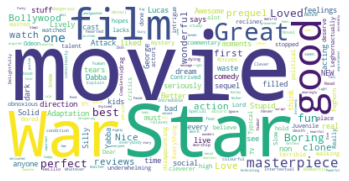

In [17]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
#wordcloud.to_file("wordcloud_cb_all.png")

## Sentiment Identification using VADER

In [18]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
sid = SentimentIntensityAnalyzer()
c = 0
for t in text:
    c+=1
    print(c, t)
    ss = sid.polarity_scores(t)
    print(ss)
    
    if(ss['compound'] >= 0.05):
        print('positive')
 
    elif(ss['compound'] <= -0.05):
        print('negative')
    else:
        print('neutral')
    print('\n')



 


1  Juvenile and underwhelming

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


2  Bored to tears

{'neg': 0.8, 'neu': 0.2, 'pos': 0.0, 'compound': -0.4588}
negative


3  Only my Odeon recliner stopped me from walking out.

{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.2263}
negative


4  Eh mystery with alot of social commentary

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


5  What? 10? Had high hopes for this, a real drag!

{'neg': 0.154, 'neu': 0.567, 'pos': 0.279, 'compound': 0.372}
positive


6  Very disappointing

{'neg': 0.777, 'neu': 0.223, 'pos': 0.0, 'compound': -0.5413}
negative


7  Stupid--just stupid

{'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'compound': -0.5267}
negative


8  Boring. Contrived. Silly.

{'neg': 0.523, 'neu': 0.227, 'pos': 0.25, 'compound': -0.296}
negative


9  Dear Lord, this movie is obnoxious

{'neg': 0.312, 'neu': 0.417, 'pos': 0.271, 'compound': -0.1027}
negative


10  What a terrible waste of talent!

{'neg

## Sentiment Classification using Machine Learning 

### Prepare 'Truth Set' 

In [20]:
label = []
for r in movie['Rating']:
    r = int(r)
    if (r>5):
        label.append('1') #Positive
    elif(r<5):
        label.append('-1') #Negative
    elif(r==5):
        label.append('0') #Netural
movie['class-label'] = label

In [21]:
movie['class-label'].value_counts()

1     75
-1    47
0      6
Name: class-label, dtype: int64

### Try-For-Fun

In [22]:
movie = movie[movie['class-label']!='0']

In [23]:
movie['class-label'].value_counts()

1     75
-1    47
Name: class-label, dtype: int64

In [24]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(122,)

In [25]:
import nltk
nltk.download('punkt')
# Stemming using TextBlob library for stemming
from textblob import TextBlob 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
def textblob_tokenizer(input_str):
    blob = TextBlob(input_str.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [27]:
#Toy example: 
print(textblob_tokenizer('Q: studed studing!!! I miss uuuu! It&#039;s'))

['q', 'stude', 'stude', 'i', 'miss', 'uuuu', 'it', '039', 's']


In [28]:
print(textblob_tokenizer(textFeatures.iloc[0]))

['juvenil', 'and', 'underwhelm']


### Try-For-Fun:

In [29]:
#countvectorizer convers each review into a vector based on the word count.
countvectorizer = CountVectorizer(analyzer= 'word', stop_words= 'english', 
                                  tokenizer=textblob_tokenizer) 
#convers text into a vector based on tf-idf weighting scheme. 
tfidfvectorizer = TfidfVectorizer(analyzer= 'word', stop_words= 'english', 
                                  tokenizer=textblob_tokenizer) 

In [30]:
textFeatures

0                           Juvenile and underwhelming\n
1                                       Bored to tears\n
2       Only my Odeon recliner stopped me from walkin...
3            Eh mystery with alot of social commentary\n
4       What? 10? Had high hopes for this, a real dra...
                             ...                        
123                     Don't expect to be entertained\n
124                            Oh c'Mon...All the fuss\n
125                                     total nonsense\n
126                                Culturally relevant\n
127                           Apparently a masterpiece\n
Name: Review, Length: 122, dtype: object

In [31]:
count_matrix = countvectorizer.fit_transform(textFeatures) 
tfidf_matrix = tfidfvectorizer.fit_transform(textFeatures)

In [32]:
print(tfidf_matrix)

  (0, 266)	0.7071067811865476
  (0, 146)	0.7071067811865476
  (1, 253)	0.729003263972213
  (1, 42)	0.6845102198783155
  (2, 274)	0.4472135954999579
  (2, 240)	0.4472135954999579
  (2, 207)	0.4472135954999579
  (2, 189)	0.4472135954999579
  (2, 192)	0.4472135954999579
  (3, 56)	0.4472135954999579
  (3, 231)	0.4472135954999579
  (3, 19)	0.4472135954999579
  (3, 177)	0.4472135954999579
  (3, 88)	0.4472135954999579
  (4, 85)	0.4371818971990752
  (4, 205)	0.40255389994932883
  (4, 256)	0.2709950418019757
  (4, 136)	0.4371818971990752
  (4, 133)	0.4371818971990752
  (4, 4)	0.4371818971990752
  (5, 80)	0.7728874417240673
  (5, 270)	0.6345431446522976
  (6, 145)	0.3968065067179326
  (6, 245)	0.9179022803252596
  (7, 224)	0.5715591639848777
  :	:
  (113, 124)	0.4236969256897306
  (113, 271)	0.4236969256897306
  (113, 49)	0.4236969256897306
  (113, 101)	0.4236969256897306
  (113, 287)	0.4236969256897306
  (113, 2)	0.32000714961599597
  (114, 81)	0.7071067811865476
  (114, 203)	0.7071067811865476

In [33]:
print(tfidf_matrix.shape) 
print(count_matrix.shape)

(122, 293)
(122, 293)


### Try-For-Fun:

### Build ML models 

In [34]:
features_train, features_test, labels_train, labels_test = train_test_split(
    tfidf_matrix, movie['class-label'], test_size=0.3,random_state=8)
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)

(85, 293) (37, 293) (85,) (37,)


In [35]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score

In [36]:
#SVM classifier
from sklearn.svm import SVC
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy:', acc)
from sklearn.metrics import precision_score
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision:', prec)
from sklearn.metrics import recall_score
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall:', recall)
from sklearn.metrics import f1_score
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ', f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))  
print(classification_report(labels_test, prediction))
#print(prediction)


Evaluation for SVM 

Accuracy: 0.6216216216216216
Precision: 0.7774244833068362
Recall: 0.6216216216216216
F-1 measure:  0.5382382382382381

Confusion Matrix:

[[ 3 14]
 [ 0 20]]
              precision    recall  f1-score   support

          -1       1.00      0.18      0.30        17
           1       0.59      1.00      0.74        20

    accuracy                           0.62        37
   macro avg       0.79      0.59      0.52        37
weighted avg       0.78      0.62      0.54        37



In [37]:
#Decision Tree
print("\nEvaluation for Decision Tree \n")
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(features_train, labels_train)
prediction = dtree.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy: ', acc)
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision: ', prec)
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall: ', recall)
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ',f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))  
print(classification_report(labels_test, prediction))


Evaluation for Decision Tree 

Accuracy:  0.4864864864864865
Precision:  0.45188723205964587
Recall:  0.4864864864864865
F-1 measure:  0.4412134583563156

Confusion Matrix:

[[ 3 14]
 [ 5 15]]
              precision    recall  f1-score   support

          -1       0.38      0.18      0.24        17
           1       0.52      0.75      0.61        20

    accuracy                           0.49        37
   macro avg       0.45      0.46      0.43        37
weighted avg       0.45      0.49      0.44        37



### Try-It-Yourself:

In [38]:
# initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()



# initialize list to store sentiment analysis results
results = []

# loop through each text and perform sentiment analysis
for t in text:
    # perform sentiment analysis
    ss = sid.polarity_scores(t)
    
    # determine sentiment category
    if ss['compound'] >= 0.05:
        sentiment = 'positive'
    elif ss['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        ss['compound']
        sentiment = 'neutral'
   
    # store results in dictionary
    result = {'text': t, 'compound_score': ss['compound'], 'sentiment': sentiment}
    
    # append result to list
    results.append(result)



In [39]:
# convert list of dictionaries to DataFrame
df = pd.DataFrame(results)

# view DataFrame
print(df.head())

                                                text  compound_score sentiment
0                       Juvenile and underwhelming\n          0.0000   neutral
1                                   Bored to tears\n         -0.4588  negative
2   Only my Odeon recliner stopped me from walkin...         -0.2263  negative
3        Eh mystery with alot of social commentary\n          0.0000   neutral
4   What? 10? Had high hopes for this, a real dra...          0.3720  positive


In [40]:
pd.set_option('display.max_rows', None)

In [41]:
df.shape

(128, 3)

In [42]:
negative_text = ' '.join(df[df['text'].apply(lambda x: sid.polarity_scores(x)['compound'] <= 0.05)]['text'].tolist())                               

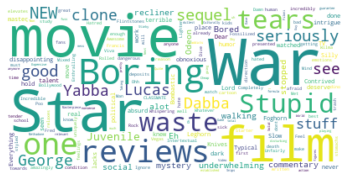

In [43]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file

In [44]:
positive_text = ' '.join(df[df['text'].apply(lambda x: sid.polarity_scores(x)['compound'] >= 0.05)]['text'].tolist())                               

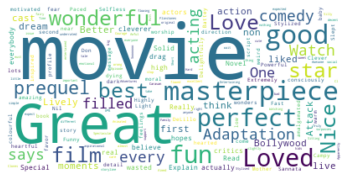

In [45]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
#wordcloud.to_file("wordcloud_cb_all.png")

In [46]:
features_train, features_test, labels_train, labels_test = train_test_split(
    count_matrix, movie['class-label'], test_size=0.3,random_state=8)
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)

(85, 293) (37, 293) (85,) (37,)


In [47]:
#SVM classifier
from sklearn.svm import SVC
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy:', acc)
from sklearn.metrics import precision_score
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision:', prec)
from sklearn.metrics import recall_score
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall:', recall)
from sklearn.metrics import f1_score
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ', f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))  
print(classification_report(labels_test, prediction))
#print(prediction)


Evaluation for SVM 

Accuracy: 0.6486486486486487
Precision: 0.7141819238593432
Recall: 0.6486486486486487
F-1 measure:  0.602520679247022

Confusion Matrix:

[[ 5 12]
 [ 1 19]]
              precision    recall  f1-score   support

          -1       0.83      0.29      0.43        17
           1       0.61      0.95      0.75        20

    accuracy                           0.65        37
   macro avg       0.72      0.62      0.59        37
weighted avg       0.71      0.65      0.60        37



In [48]:
#Decision Tree
print("\nEvaluation for Decision Tree \n")
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(features_train, labels_train)
prediction = dtree.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy: ', acc)
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision: ', prec)
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall: ', recall)
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ',f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))  
print(classification_report(labels_test, prediction))


Evaluation for Decision Tree 

Accuracy:  0.5405405405405406
Precision:  0.5279589934762349
Recall:  0.5405405405405406
F-1 measure:  0.5000330943188086

Confusion Matrix:

[[ 4 13]
 [ 4 16]]
              precision    recall  f1-score   support

          -1       0.50      0.24      0.32        17
           1       0.55      0.80      0.65        20

    accuracy                           0.54        37
   macro avg       0.53      0.52      0.49        37
weighted avg       0.53      0.54      0.50        37



TF-IDF and Bag of Words (BoW) schemes were used to evaluate two machine learning models, Decision Tree and Support Vector Machine (SVM).

The SVM model outperformed the Decision Tree model in terms of accuracy, precision, recall, and F-1 measure in the TF-IDF scheme. However, both models had higher performance in the BoW scheme than in the TF-IDF scheme. Though the SVM model still outperformed the Decision Tree model, it had a higher overall performance than the TF-IDF model.

Looking at the confusion matrix for the Decision Tree model, we can see that it is struggling to correctly classify instances of the minority class (-1). The model has a high number of false negatives, meaning it is predicting many instances as positive when they are actually negative. The SVM model, on the other hand, is better at classifying instances of the minority class, as it has fewer false negatives and more true positives.

Overall, the evaluation shows that the SVM model using the BOW scheme is the best-performing model for this task, with an accuracy of 0.648, precision of 0.714, recall of 0.649, and F-1 measure of 0.603. The Decision Tree model, on the other hand, has lower performance, with an accuracy of 0.541, precision of 0.528, recall of 0.541, and F-1 measure of 0.500. The BoW scheme also had higher performance when compared to the tf-idf scheme.
The TF-IDF scheme using the SVM classifier had an accuracy of 0.621, precision of 0.777, recall of 0.622, and F-1 measure of 0.538. The Decision Tree model, on the other hand, has lower performance, with an accuracy of 0.486, precision of 0.452, recall of 0.486, and F-1 measure of 0.449. 

Web Scrapping and Sentiment

Introduction

Web scraping is the process of extracting data from websites and these could include text, images, videos, and other types of content by appending the URL of the website in the python environment. Sentiment analysis, on the other hand, is the process of using natural language processing and machine learning techniques to determine the emotional tone of a piece of text, to denote positive, negative or neutral sentiments. To perform web scraping and sentiment analysis in Python, you can use various libraries such as Beautiful Soup, Requests, NLTK, Text Blob, and VADER. Here are the general steps for performing web scraping and sentiment analysis:

Data Processing and Experimentation


A list of 7 movies was considered for this report and the IMDb website was used to the URL of the reviews and ratings, the URLs were appended and the review container was fed into the python code so every review will be captured. To ensure the machine learning algorithm operates optimally it had to be ensured that the reviews were more than 100 and the percentage of positive to negative was not too high. Word clouds were built from the sentiments and were analyzed, stop words were also used in the creation of the word cloud so the essence of the analysis would not be lost in words that do not count 
 SVM classifier and Decision tree machine learning algorithm were used to analyze the TF_IDF and Bag of Words to compare and contrast its performances across the analysis. Overall the SVM classifier performed better in both cases compared too the decision tree which was struggling with false positives.

Conclusion

In conclusion, web scraping and sentiment analysis are powerful tools for gaining insights into customer opinions and preferences. We can analyze patterns and trends in user-generated content by scraping websites for large amounts of user-generated content. In contrast, sentiment analysis allows us to determine the emotional tone of this content, so that we can better understand how customers feel about a particular product, brand, or topic. Additionally, sentiment analysis is not always accurate and may require manual review or correction.
